In [2]:
!pip install twint

  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33927 sha256=78ae2bbcadc73636e93da87a02d1c0784a7919aa2b40bbed3850cb0a2d406980
  Stored in directory: c:\users\amine\appdata\local\pip\cache\wheels\4e\80\ea\5b82b5140b7dec857ec0bbfe908193ebf2e5d7f2ebee297519
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13489 sha256=890eac8d133ac6c8523c02a25987a8777ec85d3444a166203b08e1e487d4de6b
  Stored in directory: c:\users\amine\appdata\local\pip\cache\wheels\a0\b8\b7\8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
  Created wheel for googletransx: filename=googletransx-2.4.2-py3-none-any.whl size=15974 sha256=b50a71dde3573f4c17647da56f6c0b34cdb8ce8f7dd7f71a2de585abb888b317
  Stored in directory: c:\users\amine\appdata\local\pip\cache\wheels\6a\54\98\96b62f08dd73eca3147e36b5099d77c3f8fedc5472bb488167
Successfully built twint fake-useragent googletransx


In [1]:
!pip install textblob
!pip install textblob-fr

In [3]:
import datetime as dt
import pandas as pd
import twint
import numpy as np
import re
import matplotlib.pyplot as plt

C:\Users\amine\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [32]:
import re

def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

In [88]:
# Un exemple de message qu'on pourrait trouver, écrits de manière "vulguarisée".

X = ["j'ai adoré! c'était hyper intéressant", "drôle mais pas génial à la fois", "c'est nul","c'est trop naze..."]
X += ["je hais le cyberpunk","j'aime le cyberpunk","Achat d'impulsion datant d'une paire d'années, j'ai toujours eu des doutes concernant ce livre au moment de l'entamer. J'en ai sans cesse retarder la lecture jusque là.,Je ne suis pas adepte de la SF scénarisée où tout se passe comme si on regardait la tv. Je suis encore moins des ambiances glauques dans lesquelles l'action, les violences gratuites et les scènes de sexe","Tout d'abord, il faut savoir que je ne suis pas une grande fan de science-fiction, même s'il m'arrive d'en lire. Et celui-ci m'a tenté quand j'ai vu la série sur Netflix et je l'avais énormément apprécié. Mais lire cette histoire est quelque chose de différent. Et effectivement, je n'ai pas vraiment apprécié ma lecture. Je n'ai pas détesté l'histoire, au contraire, mais j'ai eu du mal à m'y mettre, à m'y plonger dedans, je n'avais pas l'impression de me détendre."]

X += ["Je ne noterai pas ce livre, je ne suis pas arrivée à entrer dans l'histoire. Je suis désolée, mais je n'adhère pas du tout à ce genre de lecture et j'en suis vraiment déçue... le sujet m'intéresse, c'est pour ça que je l'ai acheté. le style d'écriture ne me correspond pas, pour moi, la lecture n'est pas assez fluide et trop compliquée en vocabulaire... Je n'en dirai pas plus, c'est triste, j'ai tellement lu de belles choses et là je ne peux pas les cautionner...Je sais que William Gibson est un pionnier dans la SF et surtout dans ce genre de roman.Ce qui fait que ce lire m'attirait c'est le fait que l'histoire se passe dans le virtuel et qu'en 1984, William Gibson ait peu penser qu'un jour on pourrait virtuellement vivre des choses. même prendre possession d'un ordinateur à distance, ce qu'on fait aujourd'hui sans soucis... Quand on pense que quand nous étions petits en 1984 (j'avais 15ans) les ordinateurs n'étaient pas vraiment très évolués, même l'idée d'internet n'était pas dans toutes les têtes... alors de là à voyager dans le cyberespace... C'est cette idée qui m'intéressait vraiment, elle m'intéresse toujours d'ailleurs, peut-être qu'un jour je tomberais sur un livre qui me conviendra... je l'espère du font du coeur..."]

print(X)


["j'ai adoré! c'était hyper intéressant", 'drôle mais pas génial à la fois', "c'est nul", "c'est trop naze...", 'je hais le cyberpunk', "j'aime le cyberpunk", "Achat d'impulsion datant d'une paire d'années, j'ai toujours eu des doutes concernant ce livre au moment de l'entamer. J'en ai sans cesse retarder la lecture jusque là.,Je ne suis pas adepte de la SF scénarisée où tout se passe comme si on regardait la tv. Je suis encore moins des ambiances glauques dans lesquelles l'action, les violences gratuites et les scènes de sexe", "Tout d'abord, il faut savoir que je ne suis pas une grande fan de science-fiction, même s'il m'arrive d'en lire. Et celui-ci m'a tenté quand j'ai vu la série sur Netflix et je l'avais énormément apprécié. Mais lire cette histoire est quelque chose de différent. Et effectivement, je n'ai pas vraiment apprécié ma lecture. Je n'ai pas détesté l'histoire, au contraire, mais j'ai eu du mal à m'y mettre, à m'y plonger dedans, je n'avais pas l'impression de me détend

In [89]:
df = pd.DataFrame(data=X, columns = ["critics"])
df.head(10)

,critics
0,j'ai adoré! c'était hyper intéressant
1,drôle mais pas génial à la fois
2,c'est nul
3,c'est trop naze...
4,je hais le cyberpunk
5,j'aime le cyberpunk
6,"Achat d'impulsion datant d'une paire d'années,..."
7,"Tout d'abord, il faut savoir que je ne suis pa..."
8,"Je ne noterai pas ce livre, je ne suis pas arr..."


In [90]:
corpus = df['critics']
corpus_clean = corpus.apply(nlp_pipeline)

In [91]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

polarity = []
for msg in corpus_clean:
  polarity.append(TextBlob(msg,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0])

[0.4, 0.04000000000000001, -0.2, -0.25, 0.0, 0.6, 0.10500000000000001, 0.05249999999999999, -0.04867647058823527]


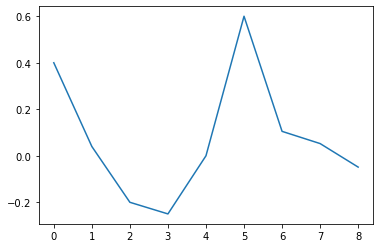

In [92]:
print(polarity)
plt.plot(polarity)

In [36]:
## C'est censé grouper par date chronologique

# group = lambda liste, size : [liste[i:i+size] for i in range(0, len(liste), size)]

# polarity_par_paquet = group(polarity,100)

# liste_moyennes = []
# for l in polarity_par_paquet :
#     liste_moyennes.append(np.mean(l))

# plt.plot(liste_moyennes)